In [ ]:
from bs4 import BeautifulSoup
import urllib
import json
import os
import re
import requests
import pandas as pd
import re
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


## Mens

In [ ]:
def grab_tt():
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get('https://www.tentree.com/collections/mens-t-shirts-tanks',
                            headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [ ]:
def parse_tt(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -803]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    data = json.loads(script2)

    return data

In [ ]:
def item_list(items_dict):
    i = 0
    items_list = []
    urls = []

    for shirt in items_dict['products']:
        j = 0
        for variant in items_dict['products'][i]['variants']:
            inner_list = []

            shirt_name = items_dict['products'][i]['title']
            inner_list.append(shirt_name)

            image_url = items_dict['products'][i]['image']
            inner_list.append(image_url)

            variant_color = items_dict['products'][i]['variants'][j]['options'][0]
            inner_list.append(variant_color)

            variant_size = items_dict['products'][i]['variants'][j]['options'][1]
            inner_list.append(variant_size)

            variant_url = str(items_dict['products'][0]['variants'][0]['variant_color_url'])
            inner_list.append(variant_url)
            urls.append(variant_url)

            variant_price = (items_dict['products'][0]['variants'][0]['price'] / 100)
            inner_list.append(variant_price)

            items_list.append(inner_list)

            j += 1

        i += 1

    # columns_ = ['Name', 'image_url', 'color', 'size', 'item_url', 'price']

    return items_list, urls

In [ ]:
def grab_ind_tt(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [ ]:
def new_urls(urls_):
    new_urls = []
    for url in urls_:
        new_url = url.replace(" ", "%20")
        new_urls.append(new_url)

    return new_urls

In [ ]:
  main_url = 'https://www.tentree.com/collections/mens-t-shirts-tanks'

  soup = grab_tt()

  print(soup)

  items_dict = parse_tt(soup)

  print(items_dict)

  items_, urls_ = item_list(items_dict) 

  new_urls = new_urls(urls_)

  # Elements: fit/details, material, wash instructions, manufacturing info

  elements_all = []
  i = 0
  for site in new_urls:
      test_url = main_url + site

      soup2 = grab_ind_tt(test_url)

      soup3 = soup2.find('div', class_='product-description')
      soup3 = soup3.findAll('li', class_='')

      elements = []
      for i_ in soup3:
          for j_ in i_.contents:
              new_ele = str(j_).replace('??', '')
              elements.append(new_ele)

      elements_all.append(elements)

      i += 1


  i = 0
  for list_ in items_:
      j = 0
      for ele in elements_all[i]:
          list_.append(ele)
          j += 1
      i += 1

  ## Added another column (description) that the womens' df didn't have - keep in mind when combining
  headers = ['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'description', 'wash_dir', 'ethical_url']

  df_mens_tt = pd.DataFrame(items_, columns=headers)

  # df.to_csv('tentree_mens.csv', index=False, header=headers)

  print(items_)
  print(len(items_))

[['Vintage Sunset T-Shirt', '1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=1628716985', 'GARGOYLE GREY HEATHER', 'M', '/products/m-vintage-sunset-t?GARGOYLE GREY HEATHER', 35.0, 'Regular Fit, Lightweight', '45% Recycled Polyester, 30% TENCEL Lyocell, 25% Organic Cotton', 'Classic short sleeve t-shirt, retro inspired graphic', 'Wash cold, hang dry', '<a href="/pages/ethical-manufacturing" target="_blank">Designed in Canada, ethically made in China</a>'], ['Vintage Sunset T-Shirt', '1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=1628716985', 'GARGOYLE GREY HEATHER', 'XXL', '/products/m-vintage-sunset-t?GARGOYLE GREY HEATHER', 35.0, 'Regular Fit, Lightweight', '45% Recycled Polyester, 30% TENCEL Lyocell, 25% Organic Cotton', 'Classic short sleeve t-shirt, retro inspired graphic', 'Wash cold, hang dry', '<a href="/pages/ethical-manufacturing" target="_blank">Designed in Canada, ethically made in China</a>'], ['Vintage Sunset T-Shirt', '1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=162871698

In [ ]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url
0,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
1,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,XXL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
2,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
3,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
4,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
...,...,...,...,...,...,...,...,...,...,...,...
221,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,CHERRY MAHOGANY HEATHER,XL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
222,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
223,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."
224,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=..."


In [ ]:
df_mens_tt[['material1', 'material2', 'material3']] = df_mens_tt['materials'].str.split(",", expand=True)

In [ ]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url,material1,material2,material3
0,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
1,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,XXL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
2,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
3,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
4,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,CHERRY MAHOGANY HEATHER,XL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
222,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
223,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
224,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic C

Add gender

In [ ]:
df_mens_tt['gender'] = "mens"

In [ ]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url,material1,material2,material3,gender
0,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
1,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,XXL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
2,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
3,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
4,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,CHERRY MAHOGANY HEATHER,XL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
222,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
223,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton,mens
224,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",45% 

Reordering columns

In [ ]:
df_mens_tt = df_mens_tt[['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'description', 'wash_dir', 'ethical_url', 'gender', 'material1', 'material2', 'material3']]

In [ ]:
df_mens_tt

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url,gender,material1,material2,material3
0,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
1,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,XXL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
2,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
3,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
4,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,CHERRY MAHOGANY HEATHER,XL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
222,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
223,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
224,Embroidered Ten Classic T-Shirt,1/2341/3995/products/TCM3009-0346.jpg?v=160384...,DARK FOREST GREEN,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens

In [ ]:
plot_order1 = df_mens_tt.groupby('price')['price'].sum().sort_values(ascending=True).index.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


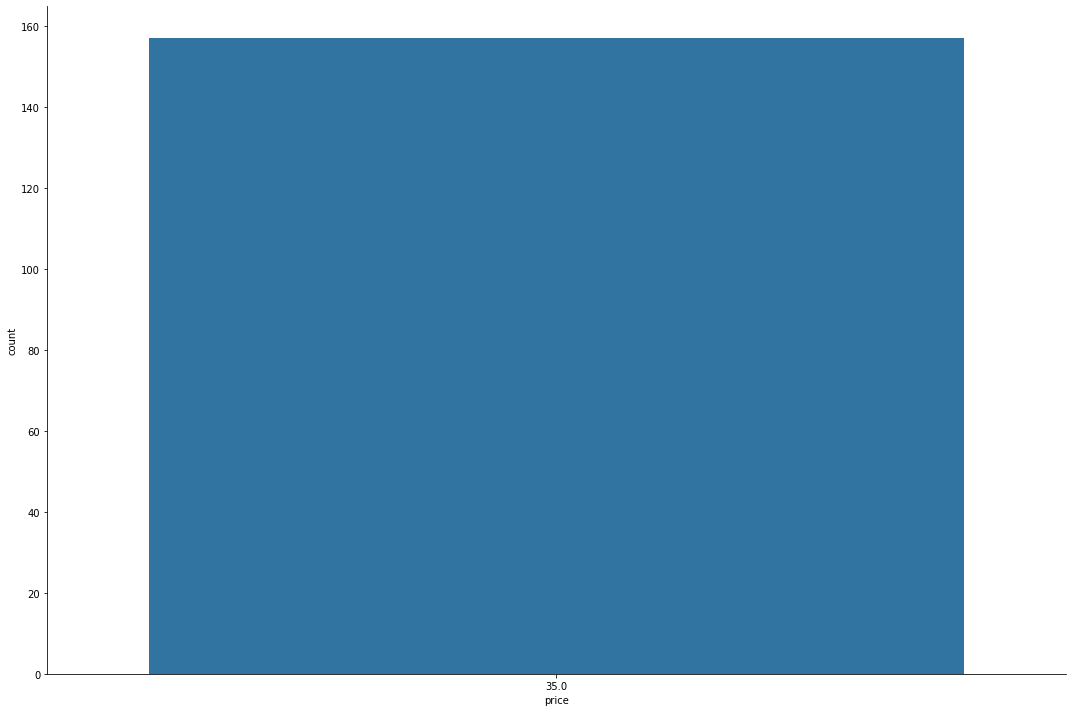

In [ ]:
sn.catplot('price', data=df_mens_tt, kind='count', height=10, aspect=1.5, order=plot_order1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


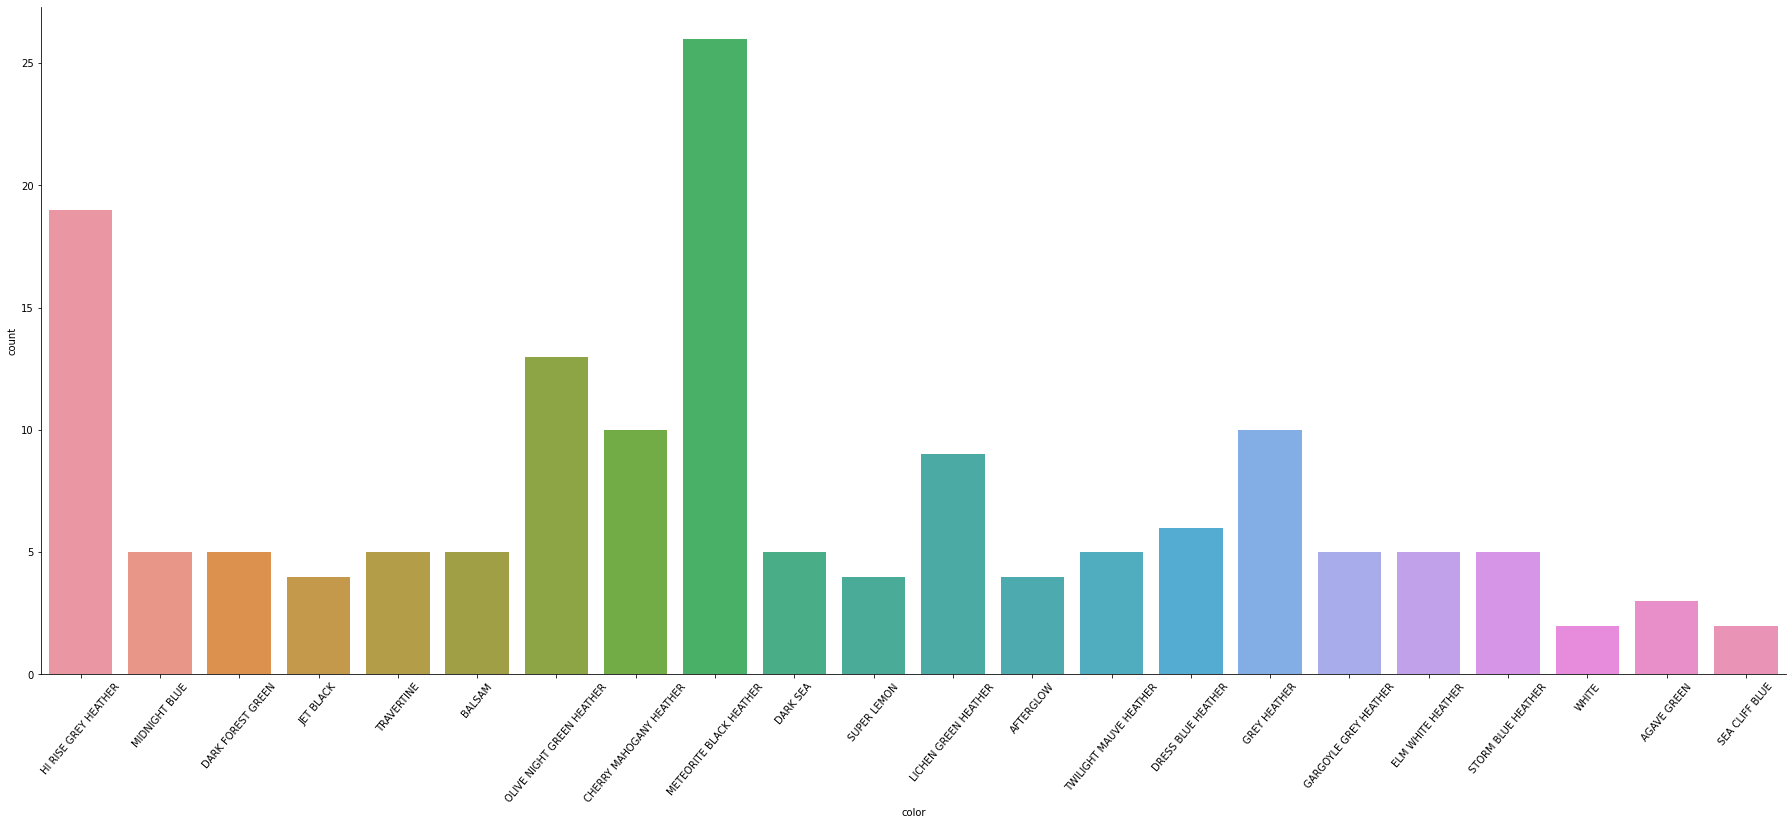

In [ ]:
g = sn.catplot('color', data=df_mens_tt, kind='count', height=10, aspect=2.5)
g.set_xticklabels(rotation=50)

In [ ]:
g = sns.barplot(x=["Asia", "Africa", "Antartica", "Europe"],
                y=[90, 30, 60, 10])
g.set_xticklabels(
    labels=["Asia", "Africa", "Antartica", "Europe"], rotation=30)
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


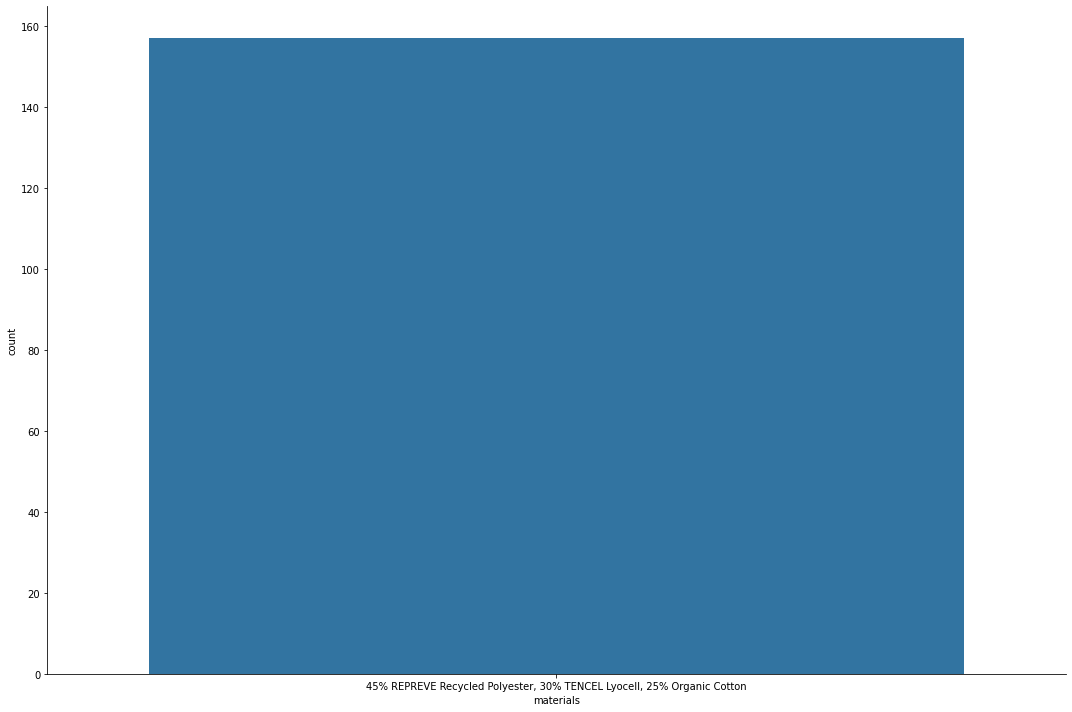

In [ ]:
sn.catplot('materials', data=df_mens_tt, kind='count', height=10, aspect=1.5)

## Womens

In [ ]:
def grab_tt_w():
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get('https://www.tentree.com/collections/womens-t-shirts-tanks',
                            headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [ ]:
def parse_tt_w(soup):
    elements = []

    beginning = "{\"products\": "
    end = "}"

    script = soup.findAll('script')[51].text.strip()[130: -1039]

    # Mens range: [130:-1060]

    script2 = beginning + script + end

    data = json.loads(script2)

    return data

In [ ]:
def item_list(items_dict):
    i = 0
    items_list = []
    urls = []

    for shirt in items_dict['products']:
        j = 0
        for variant in items_dict['products'][i]['variants']:
            inner_list = []

            shirt_name = items_dict['products'][i]['title']
            inner_list.append(shirt_name)

            image_url = items_dict['products'][i]['image']
            inner_list.append(image_url)

            variant_color = items_dict['products'][i]['variants'][j]['options'][0]
            inner_list.append(variant_color)

            variant_size = items_dict['products'][i]['variants'][j]['options'][1]
            inner_list.append(variant_size)

            variant_url = str(items_dict['products'][0]['variants'][0]['variant_color_url'])
            inner_list.append(variant_url)
            urls.append(variant_url)

            variant_price = (items_dict['products'][0]['variants'][0]['price'] / 100)
            inner_list.append(variant_price)

            items_list.append(inner_list)

            j += 1

        i += 1

    # columns_ = ['Name', 'image_url', 'color', 'size', 'item_url', 'price']

    return items_list, urls

In [ ]:
def grab_ind_tt(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    return soup

In [ ]:
def new_urls(urls_):
    new_urls = []
    for url in urls_:
        new_url = url.replace(" ", "%20")
        new_urls.append(new_url)

    return new_urls

In [ ]:
  main_url = 'https://www.tentree.com/collections/womens-t-shirts-tanks'

  soup = grab_tt_w()

  print(soup)

  items_dict = parse_tt_w(soup)

  print(items_dict)

  items_w, urls_ = item_list(items_dict)

  print(urls_)

  ## Remove the new_urls() as the womens urls are structured differently
  new_urls = urls_

  # Elements: fit/details, material, wash instructions, manufacturing info

  elements_all = []
  i = 0
  for site in new_urls:
      test_url = main_url + site

      soup2 = grab_ind_tt(test_url)

      soup3 = soup2.find('div', class_='product-description')
      soup3 = soup3.findAll('li', class_='')

      elements = []
      for i_ in soup3:
          for j_ in i_.contents:
              new_ele = str(j_).replace('??', '')
              elements.append(new_ele)

      elements_all.append(elements)

      i += 1


  i = 0
  for list_ in items_w:
      j = 0
      for ele in elements_all[i]:
          list_.append(ele)
          j += 1
      i += 1

  headers = ['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'wash_dir', 'ethical_url']

  df_womens_tt = pd.DataFrame(items_w, columns=headers)

  # df.to_csv('tentree_mens.csv', index=False, header=headers)

  # print(items_)
  # print(len(items_))

<!DOCTYPE doctype html>

<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if IE 9 ]><html class="ie9 no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<!-- Verify JS Start -->
<script async="" src="https://tentree.app.convertevent.com/verify.js"></script>
<!-- Verify JS End -->
<!-- DataLayer ================================================== -->
<script>
    window.dataLayer = window.dataLayer || [];
    dataLayer.push({

      //user parameters

      'em': '',
      'fn': '',
      'ln': '',
      'ct': '',
      'st': '',
      'zp': '',
      'ph': '', //No country code
      'ltv': '',
      'country': '',
      'uid': '',
      'currency':'USD',

      

      'ecomm_prodid': '',
      'ecomm_pagetype': 'other',
      'ecomm_totalvalue': 

In [ ]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url
0,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
1,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,S,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
2,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
3,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
4,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XL,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
...,...,...,...,...,...,...,...,...,...,...
194,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
195,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
196,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."
197,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin..."


In [ ]:
df_womens_tt['gender'] = "womens"

In [ ]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender
0,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
1,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,S,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
2,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
3,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
4,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XL,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
...,...,...,...,...,...,...,...,...,...,...,...
194,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
195,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
196,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens
197,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens


In [ ]:
df_womens_tt[['material1', 'material2']] = df_womens_tt['materials'].str.split(",", expand=True)

In [ ]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2
0,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
1,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,S,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
2,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
3,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
4,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XL,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
195,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
196,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester
197,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester


Adding in the same columns mens has to make a clean combined DF

In [ ]:
df_womens_tt['description'] = ""

In [ ]:
df_womens_tt['material3'] = ""

In [ ]:
# del df_womens_tt['materials3']

KeyError: ignored

In [ ]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,wash_dir,ethical_url,gender,material1,material2,description,material3
0,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
1,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,S,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
2,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
3,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
4,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XL,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
195,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
196,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,
197,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester","Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,,


Reorder womens df

In [ ]:
df_womens_tt = df_womens_tt[['name', 'image_url', 'color', 'size', 'url', 'price', 'fit_features', 'materials', 'description', 'wash_dir', 'ethical_url', 'gender', 'material1', 'material2', 'material3']]

In [ ]:
df_womens_tt

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url,gender,material1,material2,material3
0,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
1,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,S,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
2,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
3,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
4,Hemp V-Neck T-Shirt,1/2341/3995/products/TCW2673-20131.jpg?v=16268...,MULBERRY,XL,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
195,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
196,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
197,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,


Combining dfs (stack)

In [ ]:
total_tentree = pd.concat([df_mens_tt,df_womens_tt], ignore_index=True)

In [ ]:
total_tentree

,name,image_url,color,size,url,price,fit_features,materials,description,wash_dir,ethical_url,gender,material1,material2,material3
0,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
1,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,GARGOYLE GREY HEATHER,XXL,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
2,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,S,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
3,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,M,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
4,Vintage Sunset T-Shirt,1/2341/3995/products/TCM2096-2048--2.jg.jpg?v=...,ELM WHITE HEATHER,L,/products/m-vintage-sunset-t?GARGOYLE GREY HEA...,35.0,"Regular Fit, Lightweight","45% Recycled Polyester, 30% TENCEL Lyocell, 25...","Classic short sleeve t-shirt, retro inspired g...","Wash cold, hang dry","<a href=""/pages/ethical-manufacturing"" target=...",mens,45% Recycled Polyester,30% TENCEL Lyocell,25% Organic Cotton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Cypress Tank,1/2341/3995/products/TCW2933-2044.jpg?v=162748...,METEORITE BLACK,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
421,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,XS,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
422,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,M,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,
423,Volcano Views T-Shirt,1/2341/3995/products/TCW3269_0453_P_1-Edit.jpg...,ELM WHITE HEATHER,L,/products/hemp-v-neck-t-shirt?MULBERRY,40.0,"Regular Fit, V neck short sleeve t-shirt, scoo...","55% Hemp, 45% Recycled Polyester",,"Wash cold, hang dry","<a _blank="""" href=""/pages/ethical-manufacturin...",womens,55% Hemp,45% Recycled Polyester,


df to csv

In [ ]:
total_tentree.to_csv('tentree.csv')

In [ ]:
!cp tentree.csv "drive/My Drive/Drexel/DSCI591/data"